In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from tqdm.notebook import tqdm
from scipy.interpolate import make_interp_spline


#### $[1 \  X]$ Example

Initial Matrix: [[ 1 42]
 [ 1 25]
 [ 1  6]
 [ 1 16]
 [ 1 28]
 [ 1 88]
 [ 1 19]
 [ 1  4]
 [ 1 67]
 [ 1 87]] 

Iteration 1: max index = 5, max d_value = 3.8427735405669035, alpha_i = 0.3241154306296623
Iteration 2: max index = 7, max d_value = 3.401517735190882, alpha_i = 0.29179833124977606
Iteration 3: max index = 5, max d_value = 2.7508548821037033, alpha_i = 0.21442521872558884
Iteration 4: max index = 7, max d_value = 2.5251770209431066, alpha_i = 0.17216920191282412
Iteration 5: max index = 5, max d_value = 2.4068573594341705, alpha_i = 0.14459794260798622
Iteration 6: max index = 7, max d_value = 2.3332164974292238, alpha_i = 0.1249671370222874
Iteration 7: max index = 5, max d_value = 2.282700612107106, alpha_i = 0.110197426211059
Iteration 8: max index = 7, max d_value = 2.2457827961083767, alpha_i = 0.09864592643122151
Iteration 9: max index = 5, max d_value = 2.2175690599598967, alpha_i = 0.08934567537674735
Iteration 10: max index = 7, max d_value = 2.1952763375638407, alpha_

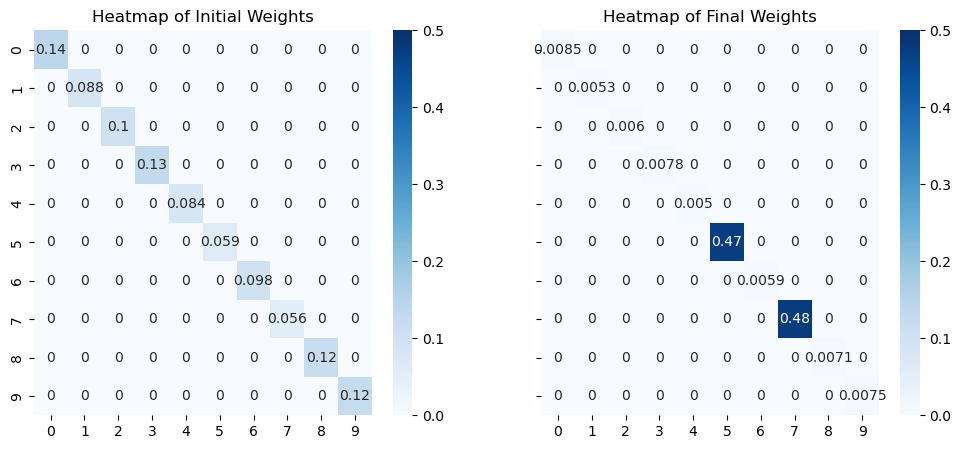

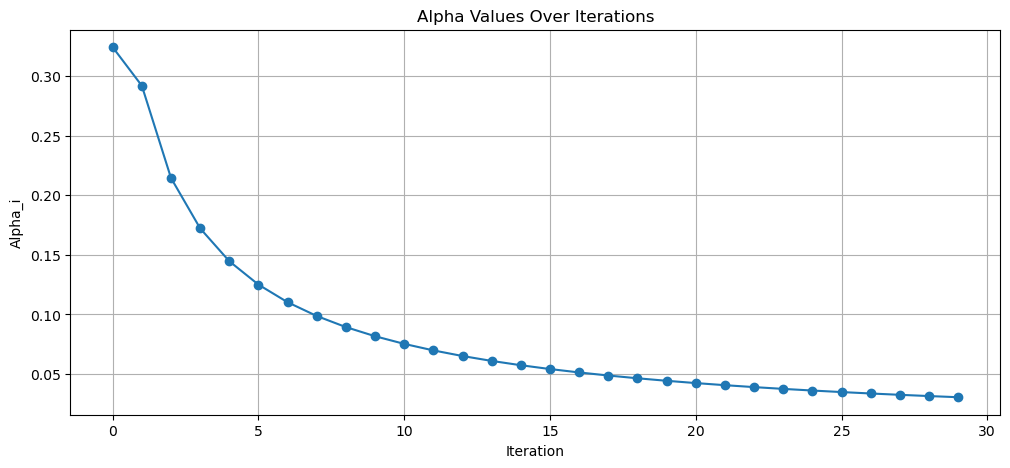

In [2]:
# Constants and parameters
num_points = 10  # Number of design points
num_iterations = 30  # Number of iterations
p = 2  # Degree of polynomial + 1

# Generate Matrix
np.random.seed(390)
X = np.random.randint(1, 101, size=num_points)
n = X.shape[0]
columns = [np.ones(n, dtype=np.int_)]
for d in range(1, p):
    columns.append(X**d)
X = np.column_stack(columns)

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_points)
weights = np.diag(initial_weights / np.sum(initial_weights))  # Create a diagonal matrix of weights
print(f"Initial Matrix: {X} \n")

# Plot initial weights heatmap (Subplot 1)
vmax = 0.5
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

cmap = 'Blues'

sns.heatmap(weights, annot=True, ax=axes[0], cmap=cmap, cbar=True, vmax=vmax)
axes[0].set_title('Heatmap of Initial Weights')

alpha_history = []

# Iteration
for i in range(num_iterations):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    M_inv = np.linalg.inv(M) if np.linalg.det(M) != 0 else None

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - p) / (p * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    print(f"Iteration {i+1}: max index = {max_index}, max d_value = {d_xi}, alpha_i = {alpha_i}")

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight  # Add the recalculated weight to x_i
    weights = new_weights  # Update Xi_n for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break



# Plot final weights heatmap
sns.heatmap(weights, ax=axes[1], annot=True, cmap=cmap, cbar=True, vmax=vmax)
axes[1].set_title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(12, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


#### $[1 \  X \ X^2]$ Example
> Note: Essentially the same as the last example as it effectively assigns weights to the extreme points through iterations and $X^2$ doesn't change the monotonicity of $X$

Initial Matrix: [[   1   42 1764]
 [   1   25  625]
 [   1    6   36]
 [   1   16  256]
 [   1   28  784]
 [   1   88 7744]
 [   1   19  361]
 [   1    4   16]
 [   1   67 4489]
 [   1   87 7569]] 

Iteration 1: max index = 5, max d_value = 5.203473972741642, alpha_i = 0.1747343575837951
Iteration 2: max index = 7, max d_value = 6.042694360564689, alpha_i = 0.20112887694585316
Iteration 3: max index = 0, max d_value = 4.167431354479766, alpha_i = 0.12285784324140579
Iteration 4: max index = 5, max d_value = 4.2436350659009, alpha_i = 0.12780260835286947
Iteration 5: max index = 7, max d_value = 3.841393699734514, alpha_i = 0.09870668982069489
Iteration 6: max index = 0, max d_value = 3.775853539323225, alpha_i = 0.09316696388244175
Iteration 7: max index = 5, max d_value = 3.666264125417563, alpha_i = 0.08329558939367013
Iteration 8: max index = 7, max d_value = 3.5840078132255067, alpha_i = 0.07533617742129484
Iteration 9: max index = 0, max d_value = 3.525011133979718, alpha_i = 0.06

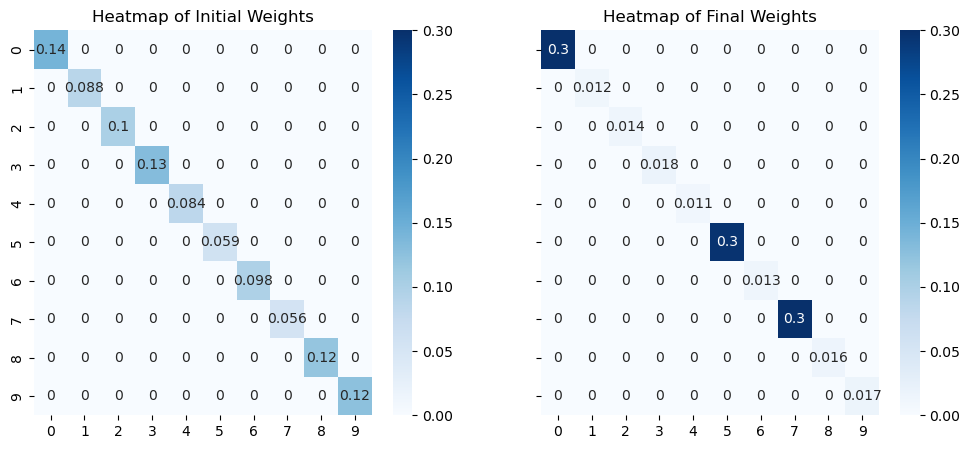

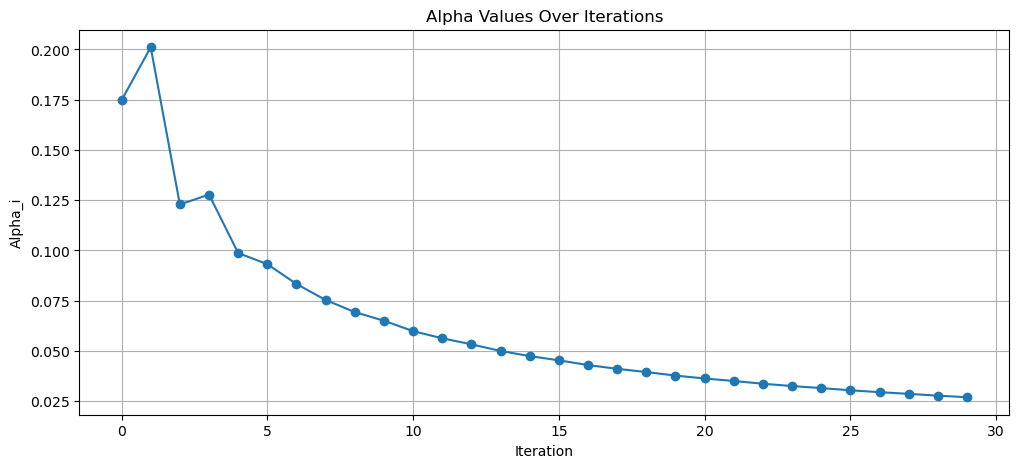

In [3]:
# Constants and parameters
num_points = 10  # Number of design points
num_iterations = 30  # Number of iterations
p = 3  # Degree of polynomial + 1

# Generate Matrix
np.random.seed(390)
X = np.random.randint(1, 101, size=num_points)
n = X.shape[0]
columns = [np.ones(n, dtype=np.int_)]
for d in range(1, p):
    columns.append(X**d)
X = np.column_stack(columns)

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_points)
weights = np.diag(initial_weights / np.sum(initial_weights))  # Create a diagonal matrix of weights
print(f"Initial Matrix: {X} \n")
# print(f"Initial Weights Matrix: {weights}\n")

# Plot initial weights heatmap (Subplot 1)
vmax = 0.3
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

cmap = 'Blues'

sns.heatmap(weights, annot=True, ax=axes[0], cmap=cmap, cbar=True, vmax=vmax)
axes[0].set_title('Heatmap of Initial Weights')

alpha_history = []

# Iteration
for i in range(num_iterations):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    M_inv = np.linalg.inv(M) if np.linalg.det(M) != 0 else None

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - p) / (p * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    print(f"Iteration {i+1}: max index = {max_index}, max d_value = {d_xi}, alpha_i = {alpha_i}")

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight  # Add the recalculated weight to x_i
    weights = new_weights  # Update Xi_n for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break

# Plot final weights heatmap
sns.heatmap(weights, ax=axes[1], annot=True, cmap=cmap, cbar=True, vmax=vmax)
axes[1].set_title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(12, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


#### $[1 \quad  X_1 \quad  X_2 \quad  X_1^2 \quad  X_2^2 \quad  X_1X_2]$ Example

Optimizing:   0%|          | 0/100 [00:00<?, ?it/s]

Convergence achieved after 73 iterations.


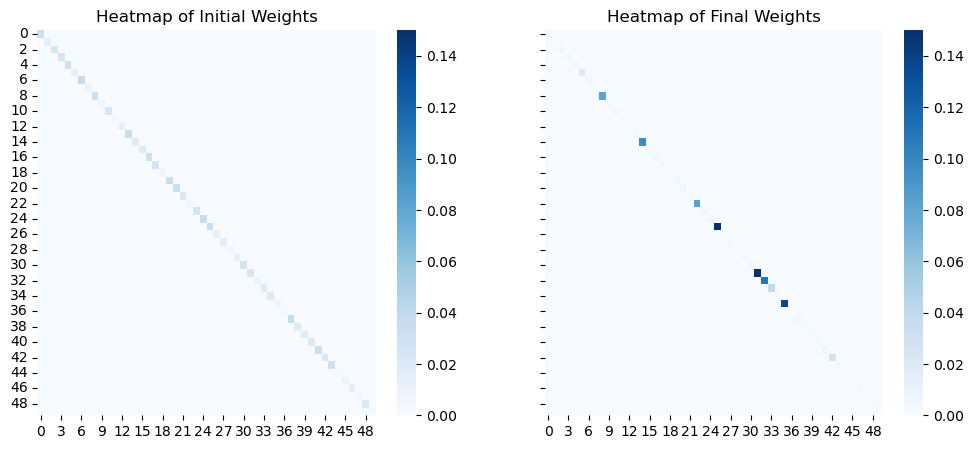

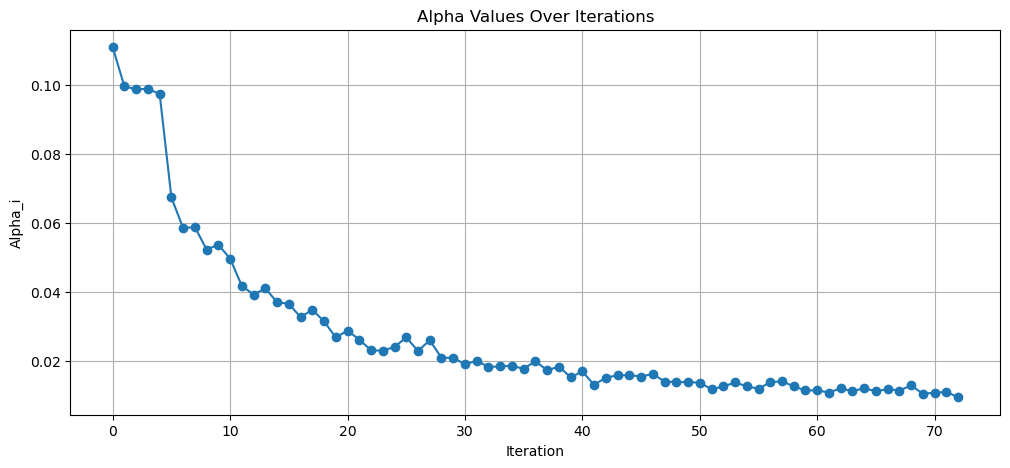

Standout weights (significantly above average) and their indices:
Index: 25, Weight: 0.1500
Index: 31, Weight: 0.1499
Index: 32, Weight: 0.1090
Index: 35, Weight: 0.1367


In [4]:
# Constants and parameters
num_obs = 50# Number of observations
np.random.seed(390)
X1 = np.random.randint(1, 10, size=num_obs)  # First predictor
X2 = np.random.randint(1, 10, size=num_obs)  # Second predictor
num_iterations = 100  # Number of iterations

# Create a design matrix with interaction and quadratic terms
X = np.column_stack([np.ones(num_obs, dtype=np.int_), X1, X2, X1**2, X2**2, X1*X2])

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_obs)
weights = np.diag(initial_weights / np.sum(initial_weights))

# Plot initial weights heatmap (Subplot 1)
vmax = 0.15
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

cmap = 'Blues'

sns.heatmap(weights, annot=False, ax=axes[0], cmap=cmap, cbar=True, vmax=vmax)
axes[0].set_title('Heatmap of Initial Weights')

alpha_history = []

# Iteration with a progress bar
for i in tqdm(range(num_iterations), desc='Optimizing'):
    # Compute the information matrix M and its inverse
    M = X.T @ weights @ X
    if np.linalg.det(M) == 0:
        print("Matrix M is singular at iteration", i)
        break
    M_inv = np.linalg.inv(M)

    # Calculate d(X, Xi_i) for each design point
    d_values = np.array([x.T @ M_inv @ x for x in X])

    # Find x_i that maximizes d(X, Xi_i)
    max_index = np.argmax(d_values)
    x_i = X[max_index]
    d_xi = d_values[max_index]

    # Calculate alpha_i
    alpha_i = (d_xi - X.shape[1]) / (X.shape[1] * (np.max(d_values) - 1))
    alpha_history.append(alpha_i)
    if alpha_i < 0 or alpha_i > 1:  # Sanity check for alpha
        print("Alpha out of bounds:", alpha_i, "at iteration", i)
        break

    # Update the design measure Xi_i+1
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight
    weights = new_weights  # Update weights for the next iteration
    assert np.isclose(np.sum(weights), 1), "Sum of weights is not 1"

    # Check for convergence
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break

# Plot final weights heatmap
sns.heatmap(weights, ax=axes[1], cmap=cmap, cbar=True, vmax=vmax)
axes[1].set_title('Heatmap of Final Weights')
plt.show()

# Plot alpha_i value tracking after all iterations
plt.figure(figsize=(12, 5))
plt.plot(alpha_history, marker='o', linestyle='-')
plt.title('Alpha Values Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Alpha_i')
plt.grid(True)
plt.show()


# Analyze and print standout weights along with their locations
final_weights = np.diag(weights)
average_weight = np.mean(final_weights)
standout_threshold = average_weight + 2 * np.std(final_weights)
standout_indices = np.where(final_weights > standout_threshold)[0]  # Get indices of standout weights
standout_weights = final_weights[standout_indices]  # Get the standout weights using indices

print("Standout weights (significantly above average) and their indices:")
for index, weight in zip(standout_indices, standout_weights):
    print(f"Index: {index}, Weight: {weight:.4f}")

### Different Method of Visualization

Optimizing:   0%|          | 0/100 [00:00<?, ?it/s]

Convergence achieved after 73 iterations.


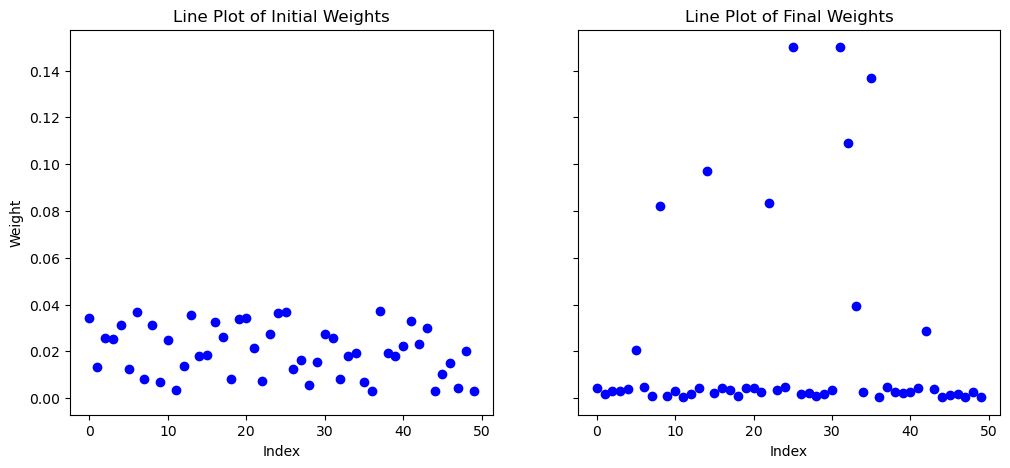

Standout weights (significantly above average) and their indices:
Index: 25, Weight: 0.1500
Index: 31, Weight: 0.1499
Index: 32, Weight: 0.1090
Index: 35, Weight: 0.1367


In [5]:
# Constants and parameters
num_obs = 50  # Number of observations
np.random.seed(390)
X1 = np.random.randint(1, 10, size=num_obs)  # First predictor
X2 = np.random.randint(1, 10, size=num_obs)  # Second predictor
num_iterations = 100  # Number of iterations

# Create a design matrix with interaction and quadratic terms
X = np.column_stack([np.ones(num_obs, dtype=np.int_), X1, X2, X1**2, X2**2, X1*X2])

# Generate initial weights and normalize them to sum to 1
initial_weights = np.random.rand(num_obs)
weights = np.diag(initial_weights / np.sum(initial_weights))

# Initial weights line plot
# Visualize the initial and final weights as line plots
fig, ax = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

ax[0].plot(np.diag(weights), 'bo', label='Initial Weights')
ax[0].set_title('Line Plot of Initial Weights')
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Weight')

# Iteration with a progress bar
for i in tqdm(range(num_iterations), desc='Optimizing'):
    M = X.T @ weights @ X
    if np.linalg.det(M) == 0:
        print("Matrix M is singular at iteration", i)
        break
    M_inv = np.linalg.inv(M)
    d_values = np.array([x.T @ M_inv @ x for x in X])
    max_index = np.argmax(d_values)
    d_xi = d_values[max_index]
    alpha_i = (d_xi - X.shape[1]) / (X.shape[1] * (np.max(d_values) - 1))
    if alpha_i < 0 or alpha_i > 1:
        print("Alpha out of bounds:", alpha_i, "at iteration", i)
        break
    new_weights = (1 - alpha_i) * weights
    additional_weight = 1 - np.sum(new_weights)
    new_weights[max_index, max_index] += additional_weight
    weights = new_weights
    if np.abs(alpha_i) < 0.01:
        print("Convergence achieved after", i+1, "iterations.")
        break


# Final weights line plot
ax[1].plot(np.diag(weights), 'bo', label='Final Weights')
ax[1].set_title('Line Plot of Final Weights')
ax[1].set_xlabel('Index')

plt.show()

# Analyze and print standout weights along with their locations
final_weights = np.diag(weights)
average_weight = np.mean(final_weights)
standout_threshold = average_weight + 2 * np.std(final_weights)
standout_indices = np.where(final_weights > standout_threshold)[0]
standout_weights = final_weights[standout_indices]

print("Standout weights (significantly above average) and their indices:")
for index, weight in zip(standout_indices, standout_weights):
    print(f"Index: {index}, Weight: {weight:.4f}")


### Comparison Across Trials

In [6]:
def run_experiment(num_obs):
    # Constants and parameters
    np.random.seed(390)
    X1 = np.random.randint(1, 10, size=num_obs)  # First predictor
    X2 = np.random.randint(1, 10, size=num_obs)  # Second predictor
    num_iterations = 100  # Number of iterations

    # Create a design matrix with interaction and quadratic terms
    X = np.column_stack([np.ones(num_obs, dtype=np.int_), X1, X2, X1**2, X2**2, X1*X2])

    # Generate initial weights and normalize them to sum to 1
    initial_weights = np.random.rand(num_obs)
    weights = np.diag(initial_weights / np.sum(initial_weights))

    # Iteration with a progress bar
    for _ in tqdm(range(num_iterations), desc=f'Optimizing for num_obs={num_obs}'):
        M = X.T @ weights @ X
        if np.linalg.det(M) == 0:
            break
        M_inv = np.linalg.inv(M)
        d_values = np.array([x.T @ M_inv @ x for x in X])
        max_index = np.argmax(d_values)
        d_xi = d_values[max_index]
        alpha_i = (d_xi - X.shape[1]) / (X.shape[1] * (np.max(d_values) - 1))
        if alpha_i < 0 or alpha_i > 1 or np.abs(alpha_i) < 0.01:
            break
        new_weights = (1 - alpha_i) * weights
        additional_weight = 1 - np.sum(new_weights)
        new_weights[max_index, max_index] += additional_weight
        weights = new_weights

    return np.diag(weights)


Optimizing for num_obs=50:   0%|          | 0/100 [00:00<?, ?it/s]

Optimizing for num_obs=100:   0%|          | 0/100 [00:00<?, ?it/s]

Optimizing for num_obs=500:   0%|          | 0/100 [00:00<?, ?it/s]

Optimizing for num_obs=2000:   0%|          | 0/100 [00:00<?, ?it/s]

Optimizing for num_obs=5000:   0%|          | 0/100 [00:00<?, ?it/s]

Optimizing for num_obs=10000:   0%|          | 0/100 [00:00<?, ?it/s]

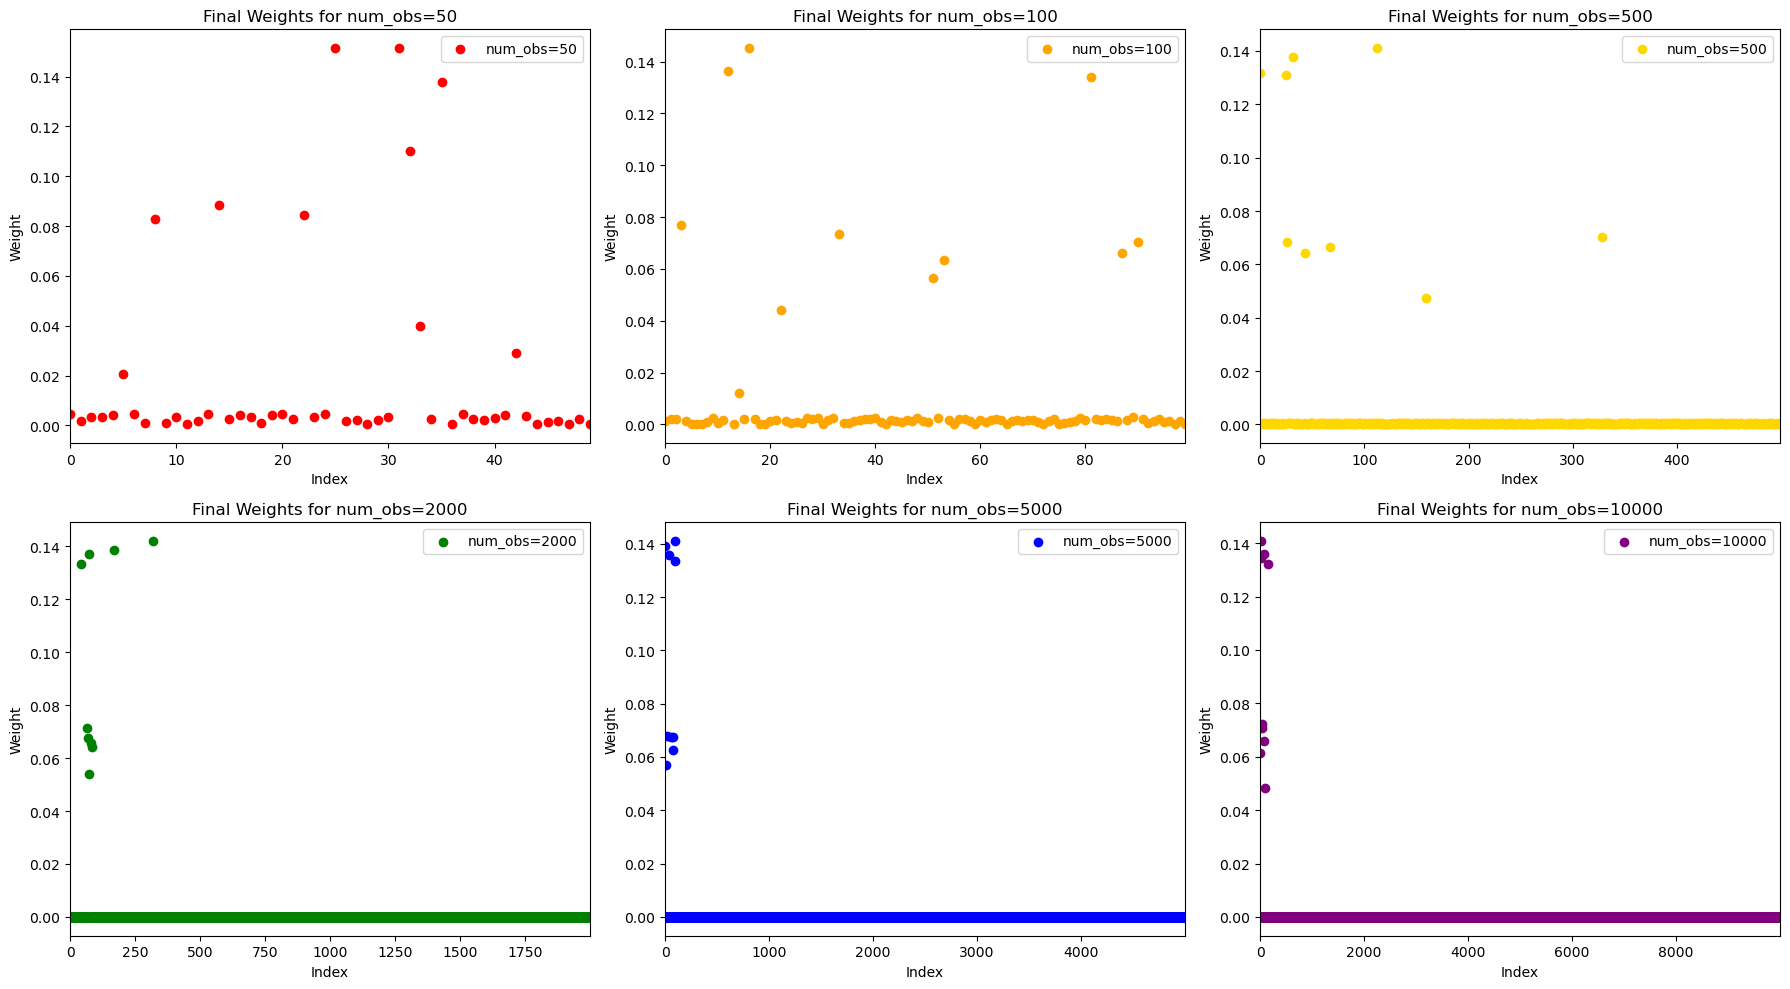

In [7]:
# Range of number of observations to test
num_obs_range = [50, 100, 500, 2000, 5000, 10000]
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

colors = ['red', 'orange', 'gold', 'green', 'blue', 'purple']

for i, num_obs in enumerate(num_obs_range):
    final_weights = run_experiment(num_obs)
    ax = axs[i // 3, i % 3]  # Determine the position in the grid
    x = np.arange(len(final_weights))
    ax.scatter(x, final_weights, c = colors[i], label=f'num_obs={num_obs}')

    ax.set_xlim([0, num_obs - 1])  # Correct x-range for each subplot
    ax.set_title(f'Final Weights for num_obs={num_obs}')
    ax.set_xlabel('Index')
    ax.set_ylabel('Weight') 
    ax.legend()

plt.tight_layout()
plt.show()